# Star Classification
This is a databased retrived from the following Kaggle page: https://www.kaggle.com/deepu1109/star-dataset from the user _Deepraj Baidya_

## Description of dataset
The dataset is made up of seven column, which are:
* Absolute Temperature [K];
* Relative Luminosity [L/Lo];
* Relative Radius [R/Ro];
* Absolute Magnitude [Mv];
* Star Color [White, Red, Blue, Yellow, Yellow-Orange, etc.];
* Spectral Class [O, B, A, F, G, K,M] (O -> Hottest Star, M -> Coolest Star);
* Star Type [Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence, SuperGiants, HyperGiants].

>Legend:
* Lo = 3.828 x 10^2 Watts (Average Luminosity of the Sun)
* Ro = 6.9551 x 10^8 m (Average Radius of the Sun)

> Class Categroy
* 0 -> Brown Dwarf
* 1 -> Red Dwarf
* 2 -> White Dwarf
* 3 -> Main Sequence
* 4 -> Supergiant
* 5 -> Hyperginat

## Goal
The goal of this notebbok is to prepare the ground, test the machine leanring models, to later be implemented in a Web Application made with _Streamlit_ package.


## Loading the libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) # Viewing all the columns

# Loading Machine Learning Packages
# Preprocessing
from sklearn.preprocessing import StandardScaler

# Pipeline
from sklearn.pipeline import Pipeline

# ParameterGrid
from sklearn.model_selection import ParameterGrid

# Train Test Split
from sklearn.model_selection import train_test_split

# Base line model
from sklearn.dummy import DummyClassifier

# Classifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import plot_confusion_matrix


## Loading the dataset

In [2]:
df= pd.read_csv('6 class csv.csv')
df.head(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
5,2840,0.000650,0.1100,16.98,0,Red,M
6,2637,0.000730,0.1270,17.22,0,Red,M
7,2600,0.000400,0.0960,17.40,0,Red,M
8,2650,0.000690,0.1100,17.45,0,Red,M
9,2700,0.000180,0.1300,16.05,0,Red,M


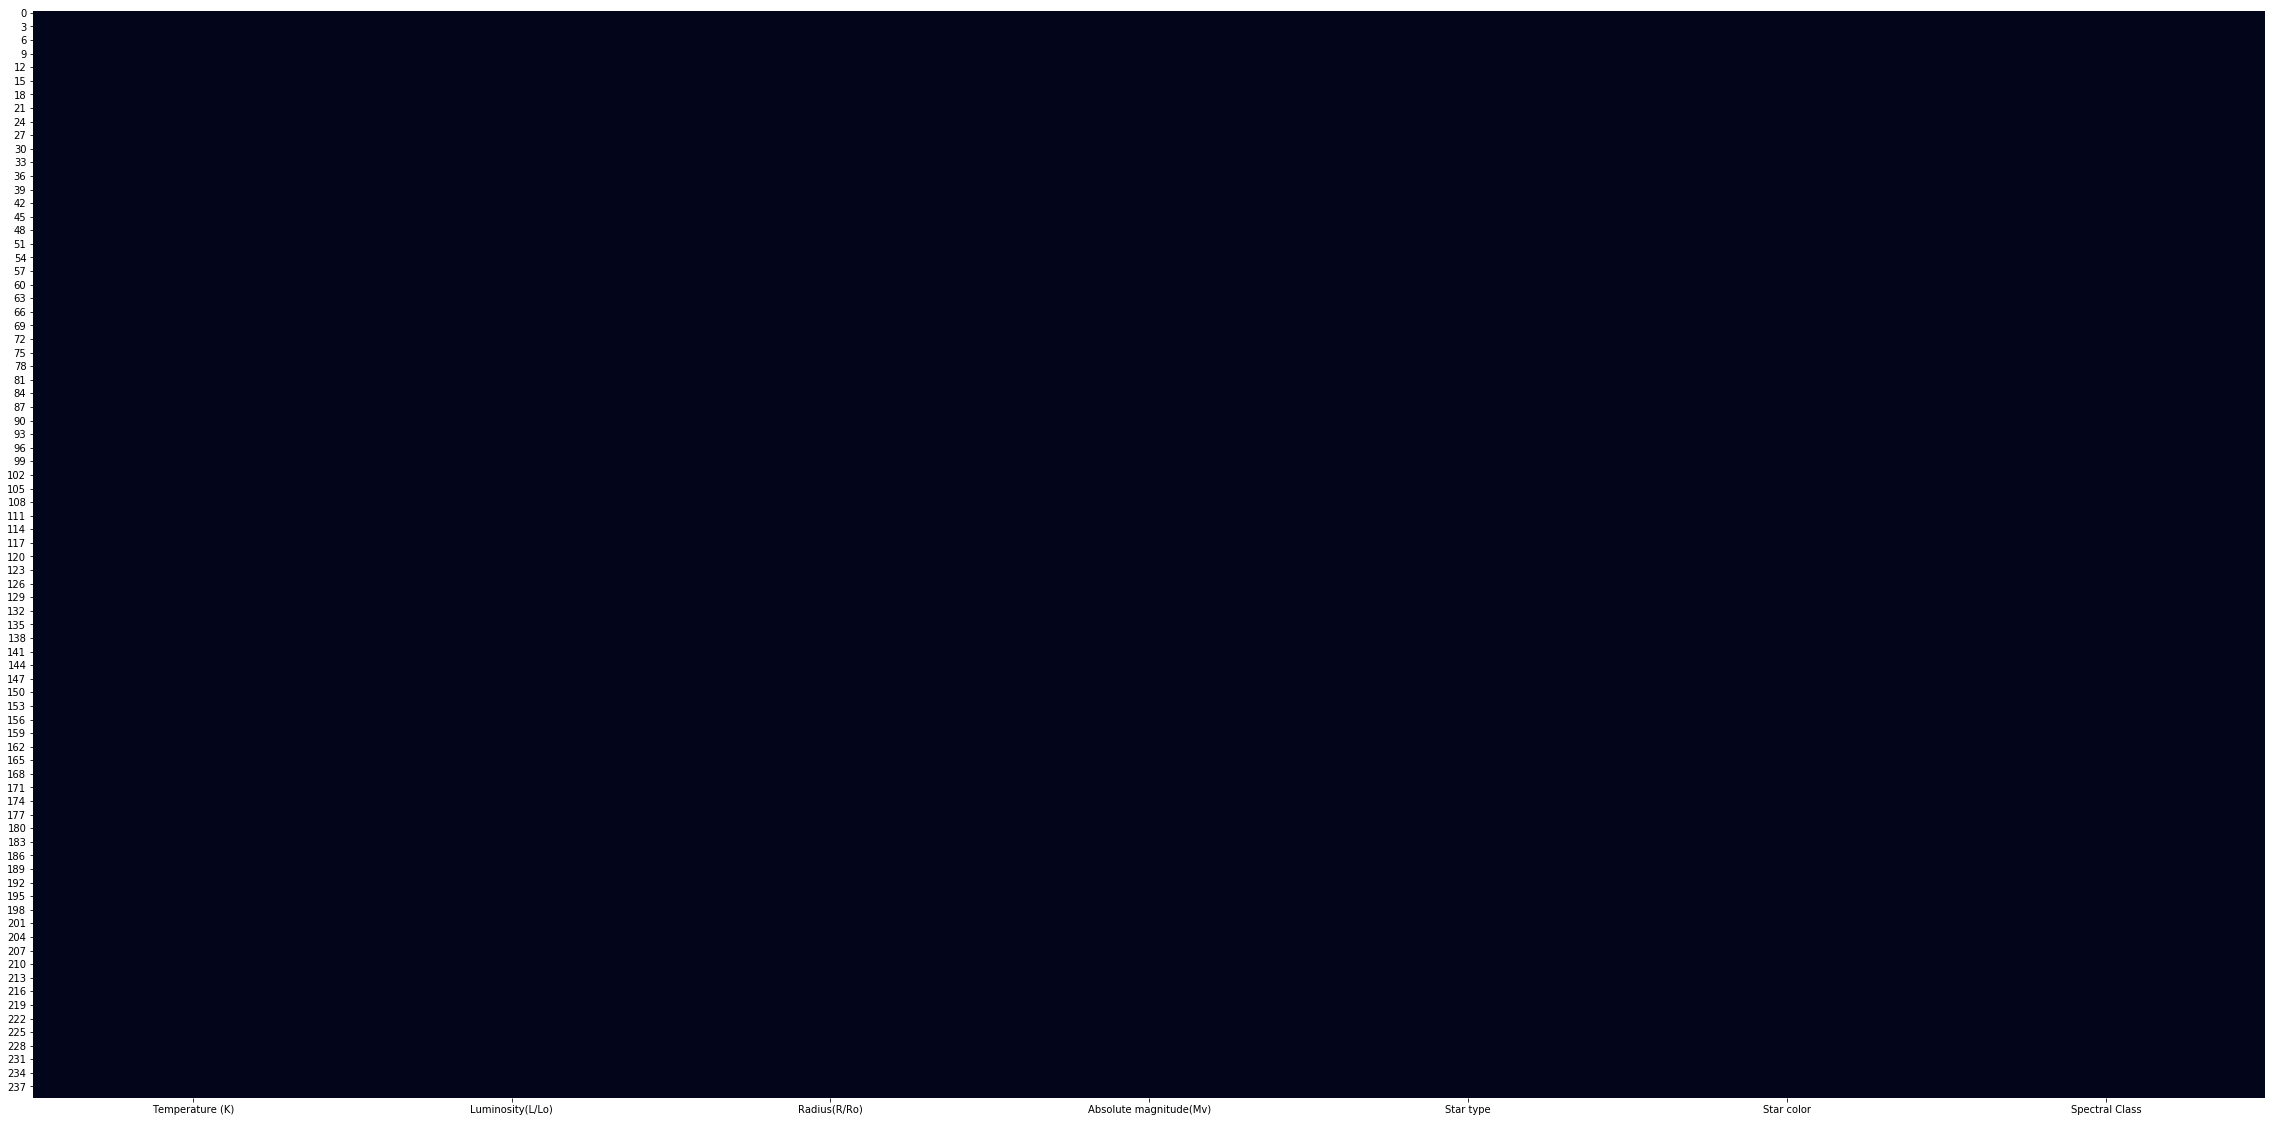

In [3]:
# Heatmap if there are any empty cell
plt.figure(figsize=(40,20))
sns.heatmap(df.isnull(), cbar=False);

In [4]:
# Changing the name of the columns
df = df.rename(columns={"Absolute magnitude(Mv)":"Absolute_magnitude(Mv)","Temperature (K)":"Temperature_(K)","Star type":"Star_type","Star color":"Star_color","Spectral Class":"Spectral_Class"})

In [5]:
#Changing the name class from number to letter
for i in range(len(df)):
    if (df.loc[i,'Star_type'] == 0):
        df.loc[i,'Star_type'] = 'Brown Dwarf'
    elif (df.loc[i,'Star_type'] == 1):
        df.loc[i,'Star_type'] = 'Red Dwarf'
    elif (df.loc[i,'Star_type'] == 2):
        df.loc[i,'Star_type'] = 'White Dwarf'
    elif (df.loc[i,'Star_type'] == 3):
        df.loc[i,'Star_type'] = 'Main Sequence'
    elif (df.loc[i,'Star_type'] == 4):
        df.loc[i,'Star_type'] = 'Supergiant'
    elif (df.loc[i,'Star_type'] == 5):
        df.loc[i,'Star_type'] = 'Hyperginat'

## Features Engineering
Here will follows one or more features engineering

## One-hot encoding
Here will be done the encoding of certain column

In [6]:
# One hot encoding
df_new = pd.get_dummies(df, columns=['Star_color','Spectral_Class'], drop_first=True)

## Machine Learning
Here will follow the implementation of the machine learning algorithm

### Creating the target and the data

In [7]:
# Create data
X_data = df_new.drop('Star_type', axis=1)
# Create target
y_target = df_new.Star_type

### Splitting the data 


In [8]:
# Splitting the data in train and test data set

# Spit in Train and Test
X_data_train,X_data_test,y_target_train,y_target_test = train_test_split(X_data,y_target, test_size = 0.4, random_state=0)

### Baseline

In [9]:
# Creating classifier
dummy_classifier = DummyClassifier(strategy="stratified")

# Fitting the classifier
dummy_classifier.fit(X_data_train,y_target_train);

# Perform classification
y_star_predicted = dummy_classifier.predict(X_data_test)

# Computing F1 Score
Base_f1_score = f1_score(y_target_test,y_star_predicted, average='micro')
print('F1 Score of Baseline:',Base_f1_score)

F1 Score of Baseline: 0.14583333333333334


### LinearSVC

In [10]:
# Creating the classifier
lsvc_classifier = LinearSVC(C=1.0, max_iter= 1000000)

# Creating Pipeline with StdScaler
lsvc_pipe_std = Pipeline([
    ('scaler',StandardScaler()),
    ('lsvc_classifier',lsvc_classifier)
])

# Creating Piple without StdScaler
lsvc_pipe = Pipeline([
    ('scaler',None),
    ('lsvc_classifier',lsvc_classifier)
])

# Fit the data
lsvc_pipe_std.fit(X_data_train,y_target_train)
lsvc_pipe.fit(X_data_train,y_target_train)

# F1 Score
f1_lsvc_Std = f1_score(y_target_test,lsvc_pipe_std.predict(X_data_test), average='micro')
print('F1 Score with std:', f1_lsvc_Std)
f1_lsvc = f1_score(y_target_test,lsvc_pipe.predict(X_data_test),average='micro')
print('F1 Score without std:', f1_lsvc)

F1 Score with std: 0.25
F1 Score without std: 0.8541666666666666


C:\Users\admin\anaconda3\envs\exts-ml\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


It works better without Std

In [11]:
# Saving the data into a table
# Create df for storing the F1 score
F1_Scores = {'model':['Linear SVC'], 'F1_score': [f1_lsvc]}
F1_Scores_class_df= pd.DataFrame(F1_Scores)

# Viweing the df
F1_Scores_class_df

,model,F1_score
0,Linear SVC,0.854167


### KNeighbour

In [12]:
# Create classifier
knnc = KNeighborsClassifier(n_neighbors= 50, algorithm='brute', n_jobs=-1)

# Creating pipelines

# With std
knnc_pipe_Std = Pipeline([
    ('scaler', StandardScaler()),
    ('knnc', knnc)
])

# Without std
knnc_pipe = Pipeline([
    ('scaler',None),
    ('knnc', knnc)
])

# Fit
knnc_pipe_Std.fit(X_data_train,y_target_train)
knnc_pipe.fit(X_data_train,y_target_train)

# Computing the F1 Score
f1_knnc_Std = f1_score(y_target_test,knnc_pipe_Std.predict(X_data_test), average='micro')
print('F1 Score with Std:', f1_knnc_Std)
f1_knnc = f1_score(y_target_test,knnc_pipe.predict(X_data_test), average='micro')
print('F1 Score without Std:', f1_knnc)



F1 Score with Std: 0.14583333333333334
F1 Score without Std: 0.36458333333333326


In [13]:
# Adding the best score to the dataframe
F1_Scores_class_df = F1_Scores_class_df.append({'model':'KNN','F1_score': f1_knnc}, ignore_index=True)
F1_Scores_class_df

,model,F1_score
0,Linear SVC,0.854167
1,KNN,0.364583
